# **Sentiment Analysis - VADER and Logistic Regression**

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
data = {
    'text': [
        "This movie was fantastic! I really enjoyed every moment.",
        "The acting was terrible and the plot made no sense.",
        "Great performances by the entire cast, especially the lead actor.",
        "Waste of time and money. One of the worst films I've seen.",
        "The storyline was predictable but still entertaining.",
        "I fell asleep halfway through. Very boring and slow-paced.",
        "Amazing cinematography and special effects! Must watch!",
        "The dialogue was so cheesy, I couldn't stop cringing.",
        "A masterpiece of modern cinema, absolutely brilliant.",
        "Terrible direction, awful screenplay, disappointing overall."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative
}


In [5]:
data

{'text': ['This movie was fantastic! I really enjoyed every moment.',
  'The acting was terrible and the plot made no sense.',
  'Great performances by the entire cast, especially the lead actor.',
  "Waste of time and money. One of the worst films I've seen.",
  'The storyline was predictable but still entertaining.',
  'I fell asleep halfway through. Very boring and slow-paced.',
  'Amazing cinematography and special effects! Must watch!',
  "The dialogue was so cheesy, I couldn't stop cringing.",
  'A masterpiece of modern cinema, absolutely brilliant.',
  'Terrible direction, awful screenplay, disappointing overall.'],
 'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]}

In [6]:
df = pd.DataFrame(data)
print("Dataset overview:")
print(df.head())
print(f"Dataset shape: {df.shape}")
print(f"Sentiment distribution: {df['sentiment'].value_counts().to_dict()}")



Dataset overview:
                                                text  sentiment
0  This movie was fantastic! I really enjoyed eve...          1
1  The acting was terrible and the plot made no s...          0
2  Great performances by the entire cast, especia...          1
3  Waste of time and money. One of the worst film...          0
4  The storyline was predictable but still entert...          1
Dataset shape: (10, 2)
Sentiment distribution: {1: 5, 0: 5}


In [7]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text


In [10]:
# Apply preprocessing to the text data
df['processed_text'] = df['text'].apply(preprocess_text)
print("\nSample of preprocessed text:")
print(df[['text', 'processed_text']].head(2))


Sample of preprocessed text:
                                                text  \
0  This movie was fantastic! I really enjoyed eve...   
1  The acting was terrible and the plot made no s...   

                                processed_text  
0  movie fantastic really enjoyed every moment  
1              acting terrible plot made sense  


# VADER Sentiment Analysis (Lexicon-based approach)

In [11]:
# APPROACH 1: VADER Sentiment Analysis (Lexicon-based approach)
print("\n--- APPROACH 1: VADER Sentiment Analysis ---")

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


--- APPROACH 1: VADER Sentiment Analysis ---


In [14]:
scores = sid.polarity_scores("movie fantastic really enjoyed every moment")
scores

{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.8016}

In [13]:
# Function to get sentiment scores using VADER
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 1  # Positive
    elif compound <= -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral


In [15]:
# Apply VADER sentiment analysis
df['vader_sentiment'] = df['text'].apply(get_vader_sentiment)

In [17]:
df

,text,sentiment,processed_text,vader_sentiment
0,This movie was fantastic! I really enjoyed eve...,1,movie fantastic really enjoyed every moment,1
1,The acting was terrible and the plot made no s...,0,acting terrible plot made sense,0
2,"Great performances by the entire cast, especia...",1,great performance entire cast especially lead ...,1
3,Waste of time and money. One of the worst film...,0,waste time money one worst film ive seen,0
4,The storyline was predictable but still entert...,1,storyline predictable still entertaining,1
5,I fell asleep halfway through. Very boring and...,0,fell asleep halfway boring slowpaced,0
6,Amazing cinematography and special effects! Mu...,1,amazing cinematography special effect must watch,1
7,"The dialogue was so cheesy, I couldn't stop cr...",0,dialogue cheesy couldnt stop cringing,1
8,"A masterpiece of modern cinema, absolutely bri...",1,masterpiece modern cinema absolutely brilliant,1
9,"Terrible direction, awful screenplay, disappoi...",0,terrible direction awful screenplay disappoint...,0


In [16]:
# Evaluate VADER performance
vader_accuracy = accuracy_score(df['sentiment'], df['vader_sentiment'])
print(f"VADER Accuracy: {vader_accuracy:.4f}")
print("VADER Classification Report:")
print(classification_report(df['sentiment'], df['vader_sentiment']))

VADER Accuracy: 0.9000
VADER Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



# Machine Learning-based Sentiment Analysis

In [18]:
print("\n--- APPROACH 2: Machine Learning-based Sentiment Analysis ---")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['sentiment'], test_size=0.3, random_state=42)


--- APPROACH 2: Machine Learning-based Sentiment Analysis ---


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7,), (3,), (7,), (3,))

In [20]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [21]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 42 stored elements and shape (7, 42)>

In [22]:
# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [23]:
# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

In [25]:
# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.3333
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


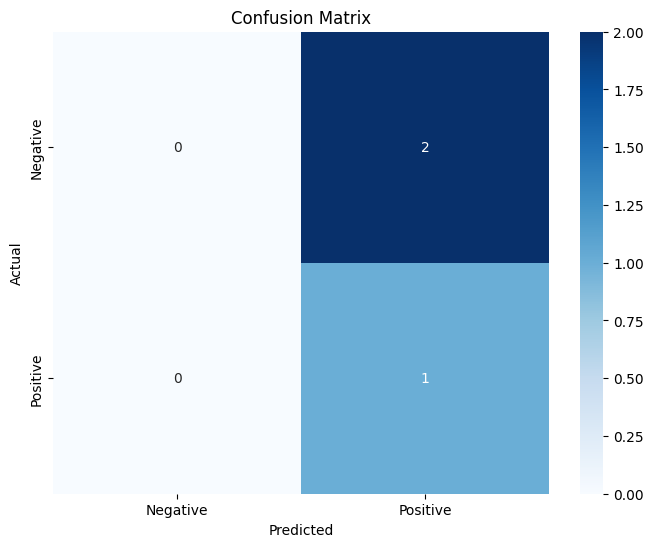

In [26]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Function to analyze new text
def analyze_sentiment(text, method='both'):
    # Preprocess the text
    processed = preprocess_text(text)

    results = {}

    if method in ['vader', 'both']:
        # VADER analysis
        scores = sid.polarity_scores(text)
        vader_sentiment = "Positive" if scores['compound'] >= 0.05 else "Negative" if scores['compound'] <= -0.05 else "Neutral"
        results['vader'] = {
            'sentiment': vader_sentiment,
            'compound_score': scores['compound'],
            'pos_score': scores['pos'],
            'neg_score': scores['neg'],
            'neu_score': scores['neu']
        }

    if method in ['ml', 'both']:
        # ML-based analysis
        text_tfidf = tfidf_vectorizer.transform([processed])
        prediction = lr_model.predict(text_tfidf)[0]
        proba = lr_model.predict_proba(text_tfidf)[0]
        ml_sentiment = "Positive" if prediction == 1 else "Negative"
        results['ml'] = {
            'sentiment': ml_sentiment,
            'confidence': proba[prediction]
        }

    return results


In [28]:
# Test the analysis function with a new example
new_text = "The characters were well developed and the storyline was captivating."
analysis_result = analyze_sentiment(new_text)
print("\nSentiment Analysis for new text:")
print(f"Text: '{new_text}'")
print(f"VADER Result: {analysis_result['vader']['sentiment']} (Compound Score: {analysis_result['vader']['compound_score']:.4f})")
print(f"ML Result: {analysis_result['ml']['sentiment']} (Confidence: {analysis_result['ml']['confidence']:.4f})")



Sentiment Analysis for new text:
Text: 'The characters were well developed and the storyline was captivating.'
VADER Result: Positive (Compound Score: 0.2732)
ML Result: Positive (Confidence: 0.6154)
